FIFA Ranking Analysis for Euro 2024

Dataset Source : https://www.kaggle.com/datasets/cashncarry/fifaworldranking/data (CC0: Public Domain)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rankings = pd.read_csv('C:/Users/MSI/Desktop/TunisiaLocalChapter_UEFAEURO2024/Datasets/fifa_ranking-2024-04-04.csv')
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,83.0,Guatemala,GUA,15.0,0.0,83,CONCACAF,1992-12-31
1,32.0,Zambia,ZAM,38.0,0.0,32,CAF,1992-12-31
2,33.0,Portugal,POR,38.0,0.0,33,UEFA,1992-12-31
3,34.0,Austria,AUT,38.0,0.0,34,UEFA,1992-12-31
4,35.0,Colombia,COL,36.0,0.0,35,CONMEBOL,1992-12-31


In [3]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67261 entries, 0 to 67260
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             67253 non-null  float64
 1   country_full     67261 non-null  object 
 2   country_abrv     67261 non-null  object 
 3   total_points     67261 non-null  float64
 4   previous_points  67261 non-null  float64
 5   rank_change      67261 non-null  int64  
 6   confederation    67261 non-null  object 
 7   rank_date        67261 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.1+ MB


In [4]:
rankings.country_full.value_counts()

country_full
Guatemala                332
Liberia                  332
Kenya                    332
Korea DPR                332
Peru                     332
                        ... 
Zaire                     67
Gibraltar                 67
Netherlands Antilles      44
Serbia and Montenegro     43
Czechoslovakia             6
Name: count, Length: 216, dtype: int64

Create a dictionary for the teams in the group stage of Euro 2024

In [5]:
euro_grp_stage = {'A':['Germany','Hungary','Switzerland','Scotland'],
                  'B':['Albania','Croatia','Italy','Spain'],
                  'C':['Denmark','England','Serbia','Slovenia'],
                  'D':['Austria','France','Netherlands','Poland'],
                  'E':['Belgium','Romania','Slovakia','Ukraine'],
                  'F':['Czechia','Georgia','Portugal','Turkey']}

euro_grp_stage_teams = [team for grp in euro_grp_stage.values() for team in grp]

print(euro_grp_stage_teams)

['Germany', 'Hungary', 'Switzerland', 'Scotland', 'Albania', 'Croatia', 'Italy', 'Spain', 'Denmark', 'England', 'Serbia', 'Slovenia', 'Austria', 'France', 'Netherlands', 'Poland', 'Belgium', 'Romania', 'Slovakia', 'Ukraine', 'Czechia', 'Georgia', 'Portugal', 'Turkey']


In [6]:
rankings.country_full.value_counts()[euro_grp_stage_teams]

country_full
Germany        332
Hungary        332
Switzerland    332
Scotland       332
Albania        332
Croatia        332
Italy          332
Spain          332
Denmark        332
England        332
Serbia         189
Slovenia       332
Austria        332
France         332
Netherlands    332
Poland         332
Belgium        332
Romania        332
Slovakia       328
Ukraine        332
Czechia        325
Georgia        325
Portugal       332
Turkey         332
Name: count, dtype: int64

Taking the data of the Euro 2024 group stage teams from the dataset

In [7]:
euro_ranking = rankings.loc[rankings.country_full.isin(euro_grp_stage_teams)]
euro_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
2,33.0,Portugal,POR,38.0,0.0,33,UEFA,1992-12-31
3,34.0,Austria,AUT,38.0,0.0,34,UEFA,1992-12-31
5,36.0,Hungary,HUN,36.0,0.0,36,UEFA,1992-12-31
11,42.0,Turkey,TUR,31.0,0.0,42,UEFA,1992-12-31
31,5.0,England,ENG,55.0,0.0,5,UEFA,1992-12-31


In [8]:
euro_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7807 entries, 2 to 67184
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             7807 non-null   float64
 1   country_full     7807 non-null   object 
 2   country_abrv     7807 non-null   object 
 3   total_points     7807 non-null   float64
 4   previous_points  7807 non-null   float64
 5   rank_change      7807 non-null   int64  
 6   confederation    7807 non-null   object 
 7   rank_date        7807 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 548.9+ KB


In [9]:
euro_ranking.rank_date.value_counts()

rank_date
2008-05-07    24
2013-08-08    24
2013-06-06    24
2013-05-09    24
2013-04-11    24
              ..
1993-11-19    21
1993-09-23    20
1993-08-08    20
1993-10-22    20
1992-12-31    20
Name: count, Length: 332, dtype: int64

In [10]:
euro_ranking['rank_date'] = pd.to_datetime(euro_ranking['rank_date'])
euro_ranking['year'] = euro_ranking['rank_date'].dt.year
euro_ranking

C:\Users\MSI\AppData\Local\Temp\ipykernel_13872\904943806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_ranking['rank_date'] = pd.to_datetime(euro_ranking['rank_date'])
C:\Users\MSI\AppData\Local\Temp\ipykernel_13872\904943806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_ranking['year'] = euro_ranking['rank_date'].dt.year


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year
2,33.0,Portugal,POR,38.00,0.00,33,UEFA,1992-12-31,1992
3,34.0,Austria,AUT,38.00,0.00,34,UEFA,1992-12-31,1992
5,36.0,Hungary,HUN,36.00,0.00,36,UEFA,1992-12-31,1992
11,42.0,Turkey,TUR,31.00,0.00,42,UEFA,1992-12-31,1992
31,5.0,England,ENG,55.00,0.00,5,UEFA,1992-12-31,1992
...,...,...,...,...,...,...,...,...,...
67148,36.0,Czechia,CZE,1501.47,1494.04,-4,UEFA,2024-04-04,2024
67151,33.0,Serbia,SRB,1514.20,1517.43,1,UEFA,2024-04-04,2024
67154,4.0,England,ENG,1794.90,1800.05,1,UEFA,2024-04-04,2024
67183,2.0,France,FRA,1840.59,1845.44,0,UEFA,2024-04-04,2024


Visualizing of the Change in World Rank for each Team Over Time

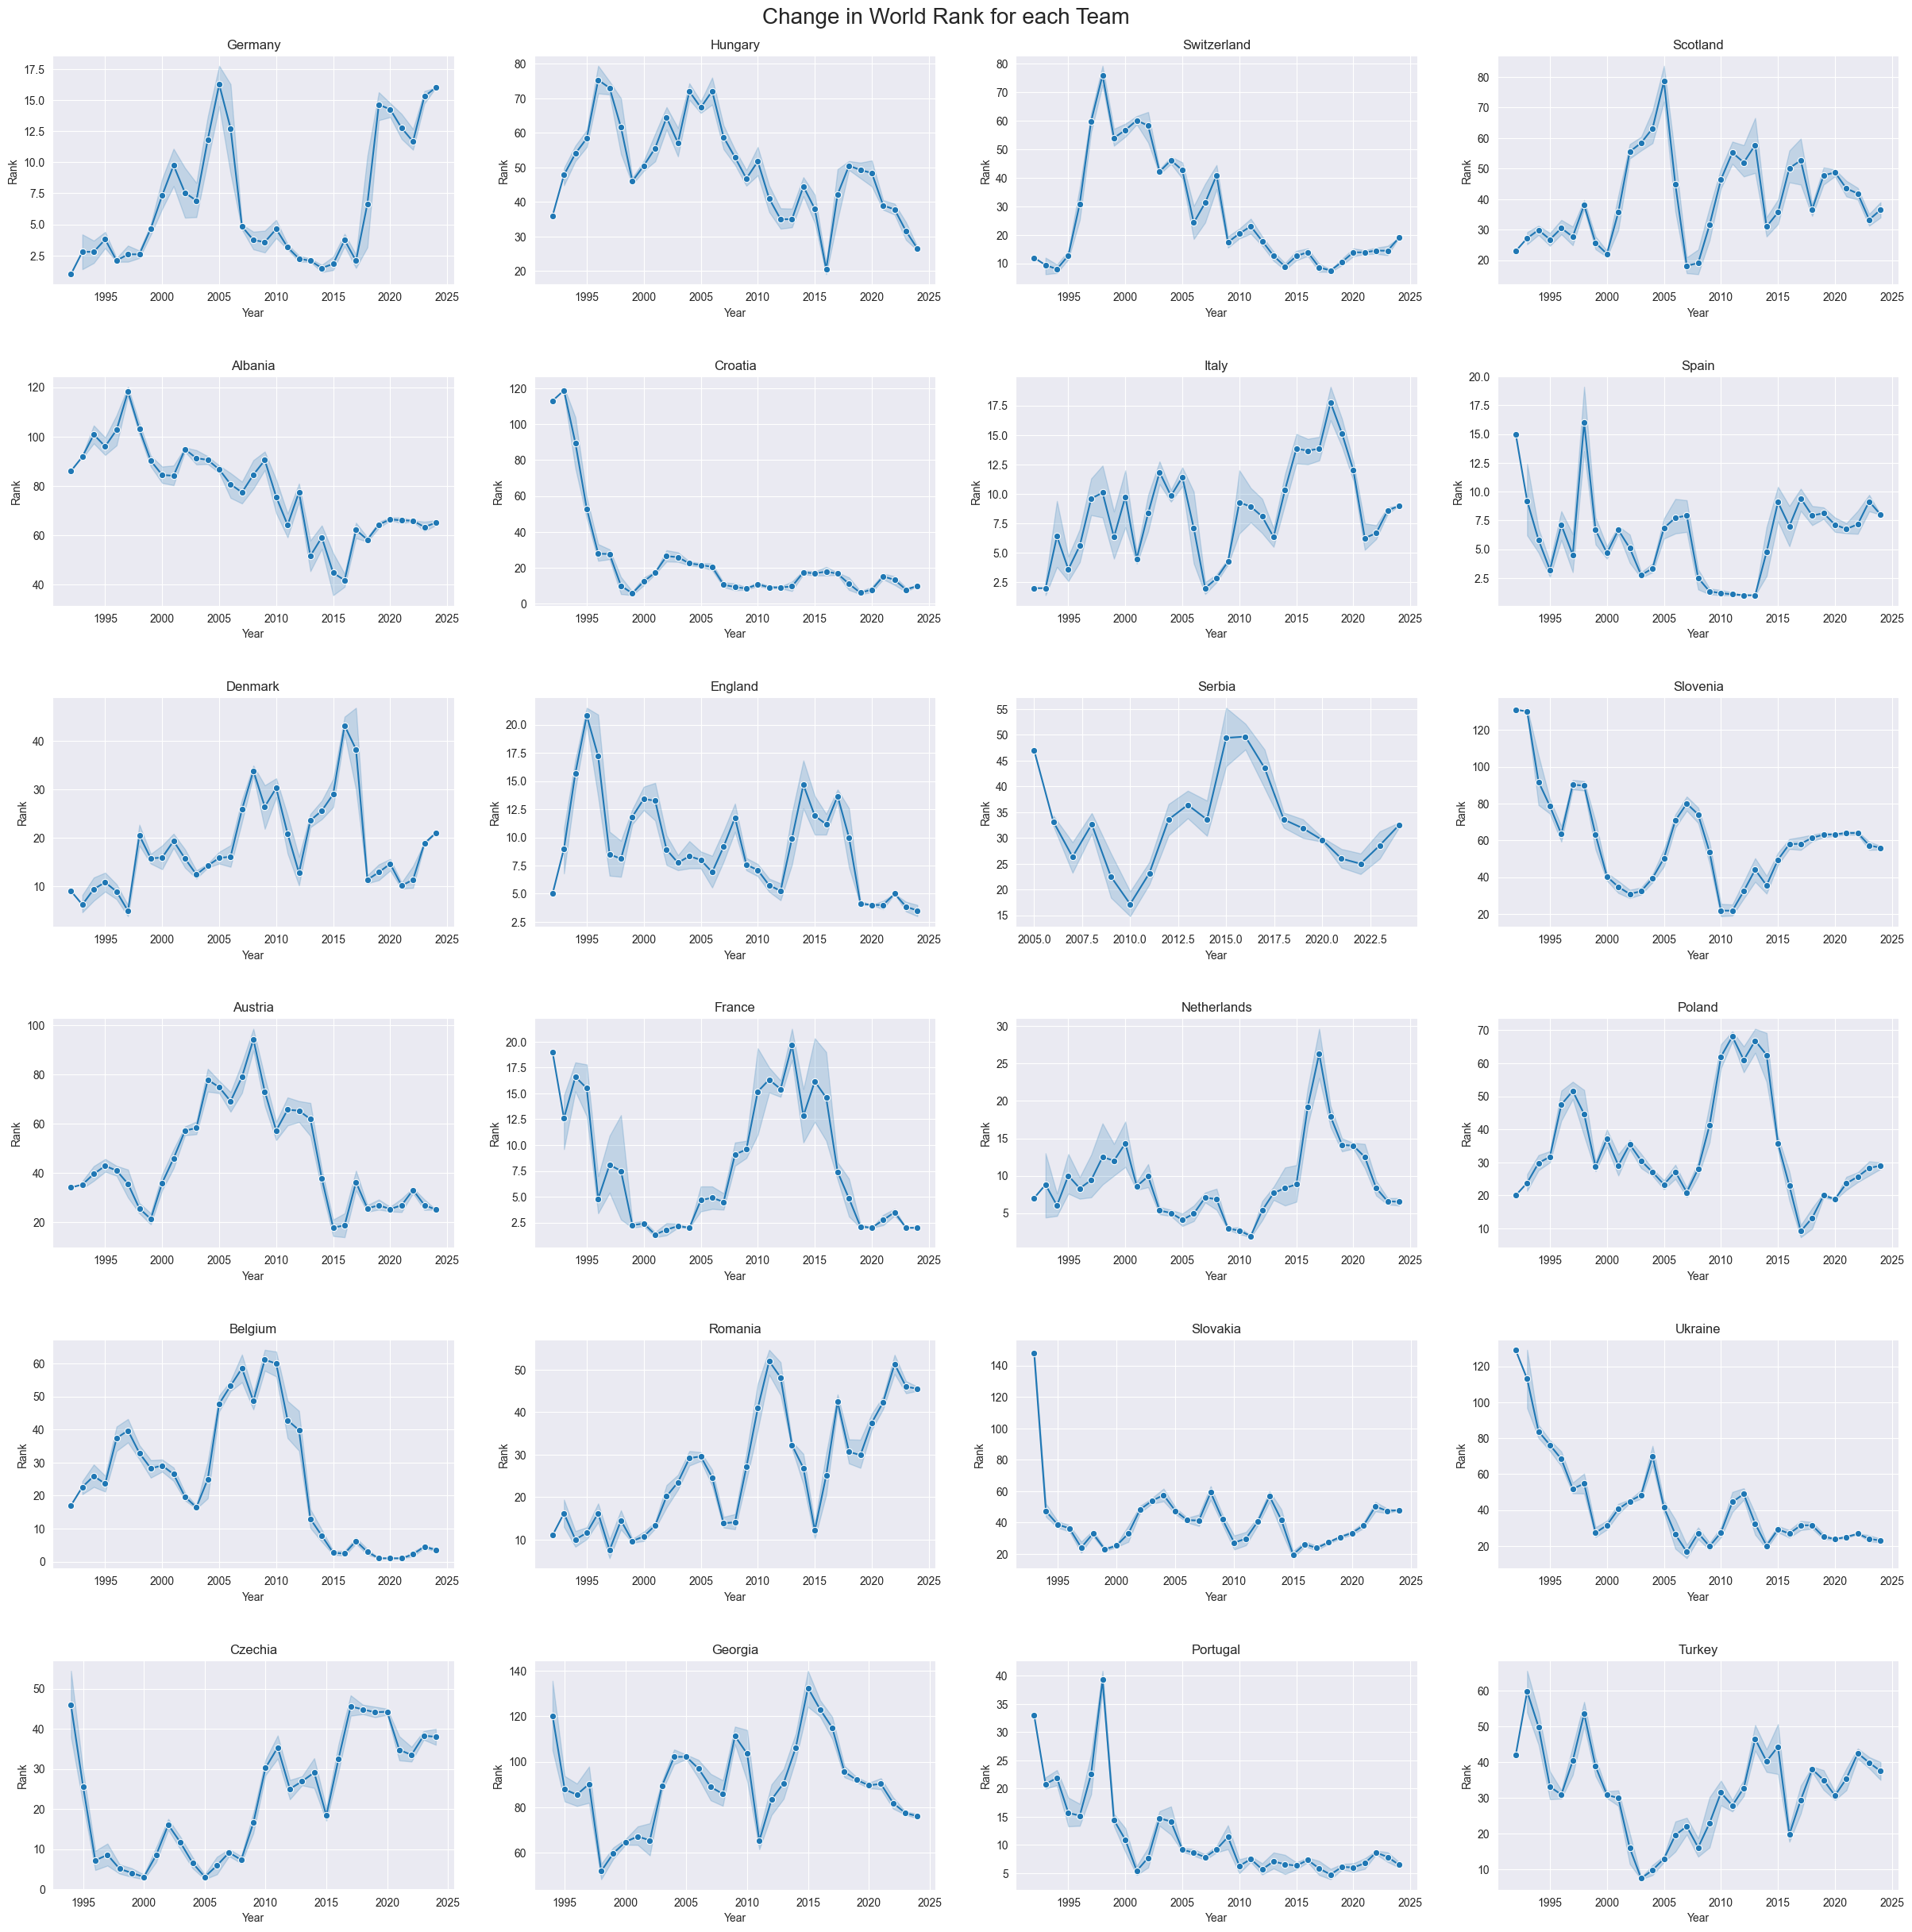

In [18]:
fig, axes = plt.subplots(6,4, figsize=(30,30))
plt.subplots_adjust(hspace=0.4)
axes = axes.flatten()
fig.suptitle('Change in World Rank for each Team', fontsize=20, y=0.9)

for ax,team in zip(axes, euro_grp_stage_teams):
    data = euro_ranking[euro_ranking['country_full']==team]
    sns.set_style('darkgrid')
    sns.lineplot(ax=ax, x='year', y='rank', data=data, marker='o')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rank')
    ax.set_title(team)

Visualizing of the Change in World Ranks based on each Group

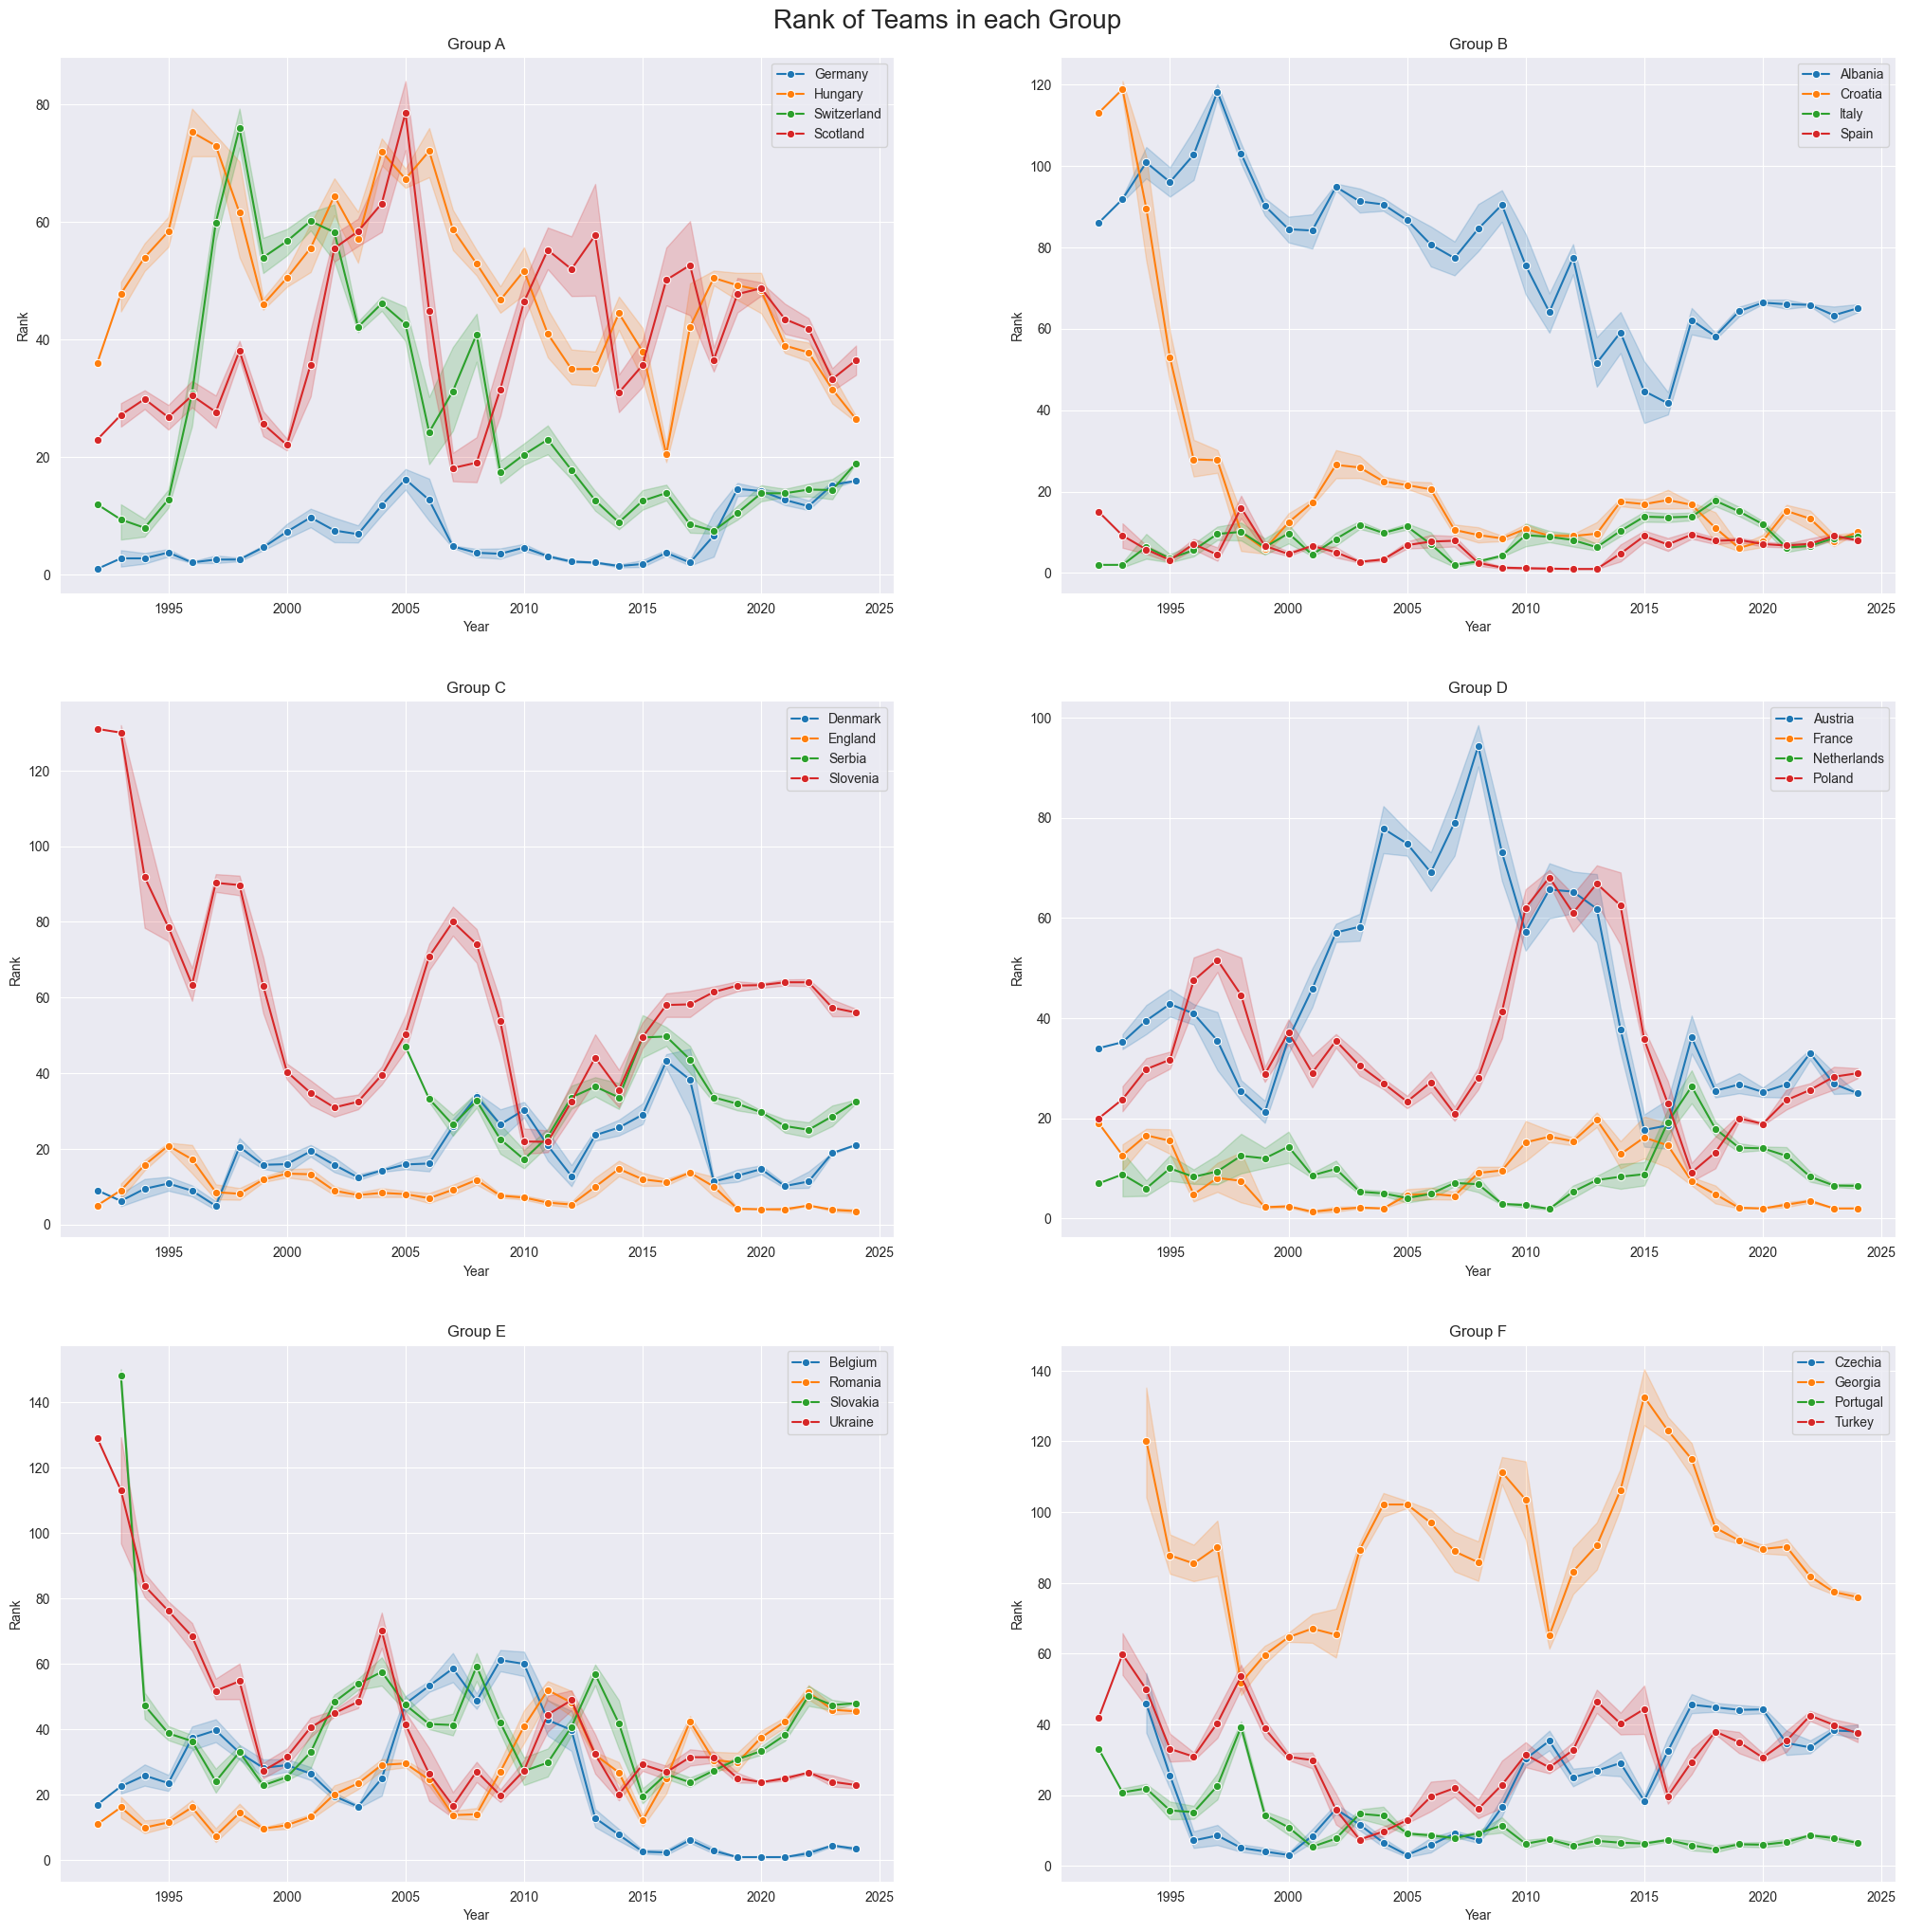

In [12]:
fig, axes = plt.subplots(3,2, figsize=(25,25))
plt.subplots_adjust(hspace=0.2)
axes = axes.flatten()
fig.suptitle("Rank of Teams in each Group", fontsize = 20, y=0.9)

for ax,grp in zip(axes, euro_grp_stage):
    for team in euro_grp_stage[grp]:
        data = euro_ranking[euro_ranking['country_full']==team]
        sns.set_style('darkgrid')
        sns.lineplot(ax=ax, x='year', y='rank', data=data, marker='o', label=team)
        ax.set_xlabel('Year')
        ax.set_ylabel('Rank')
        ax.set_title(f'Group {grp}')

Visualizing the Total Points of each Team based on each Group

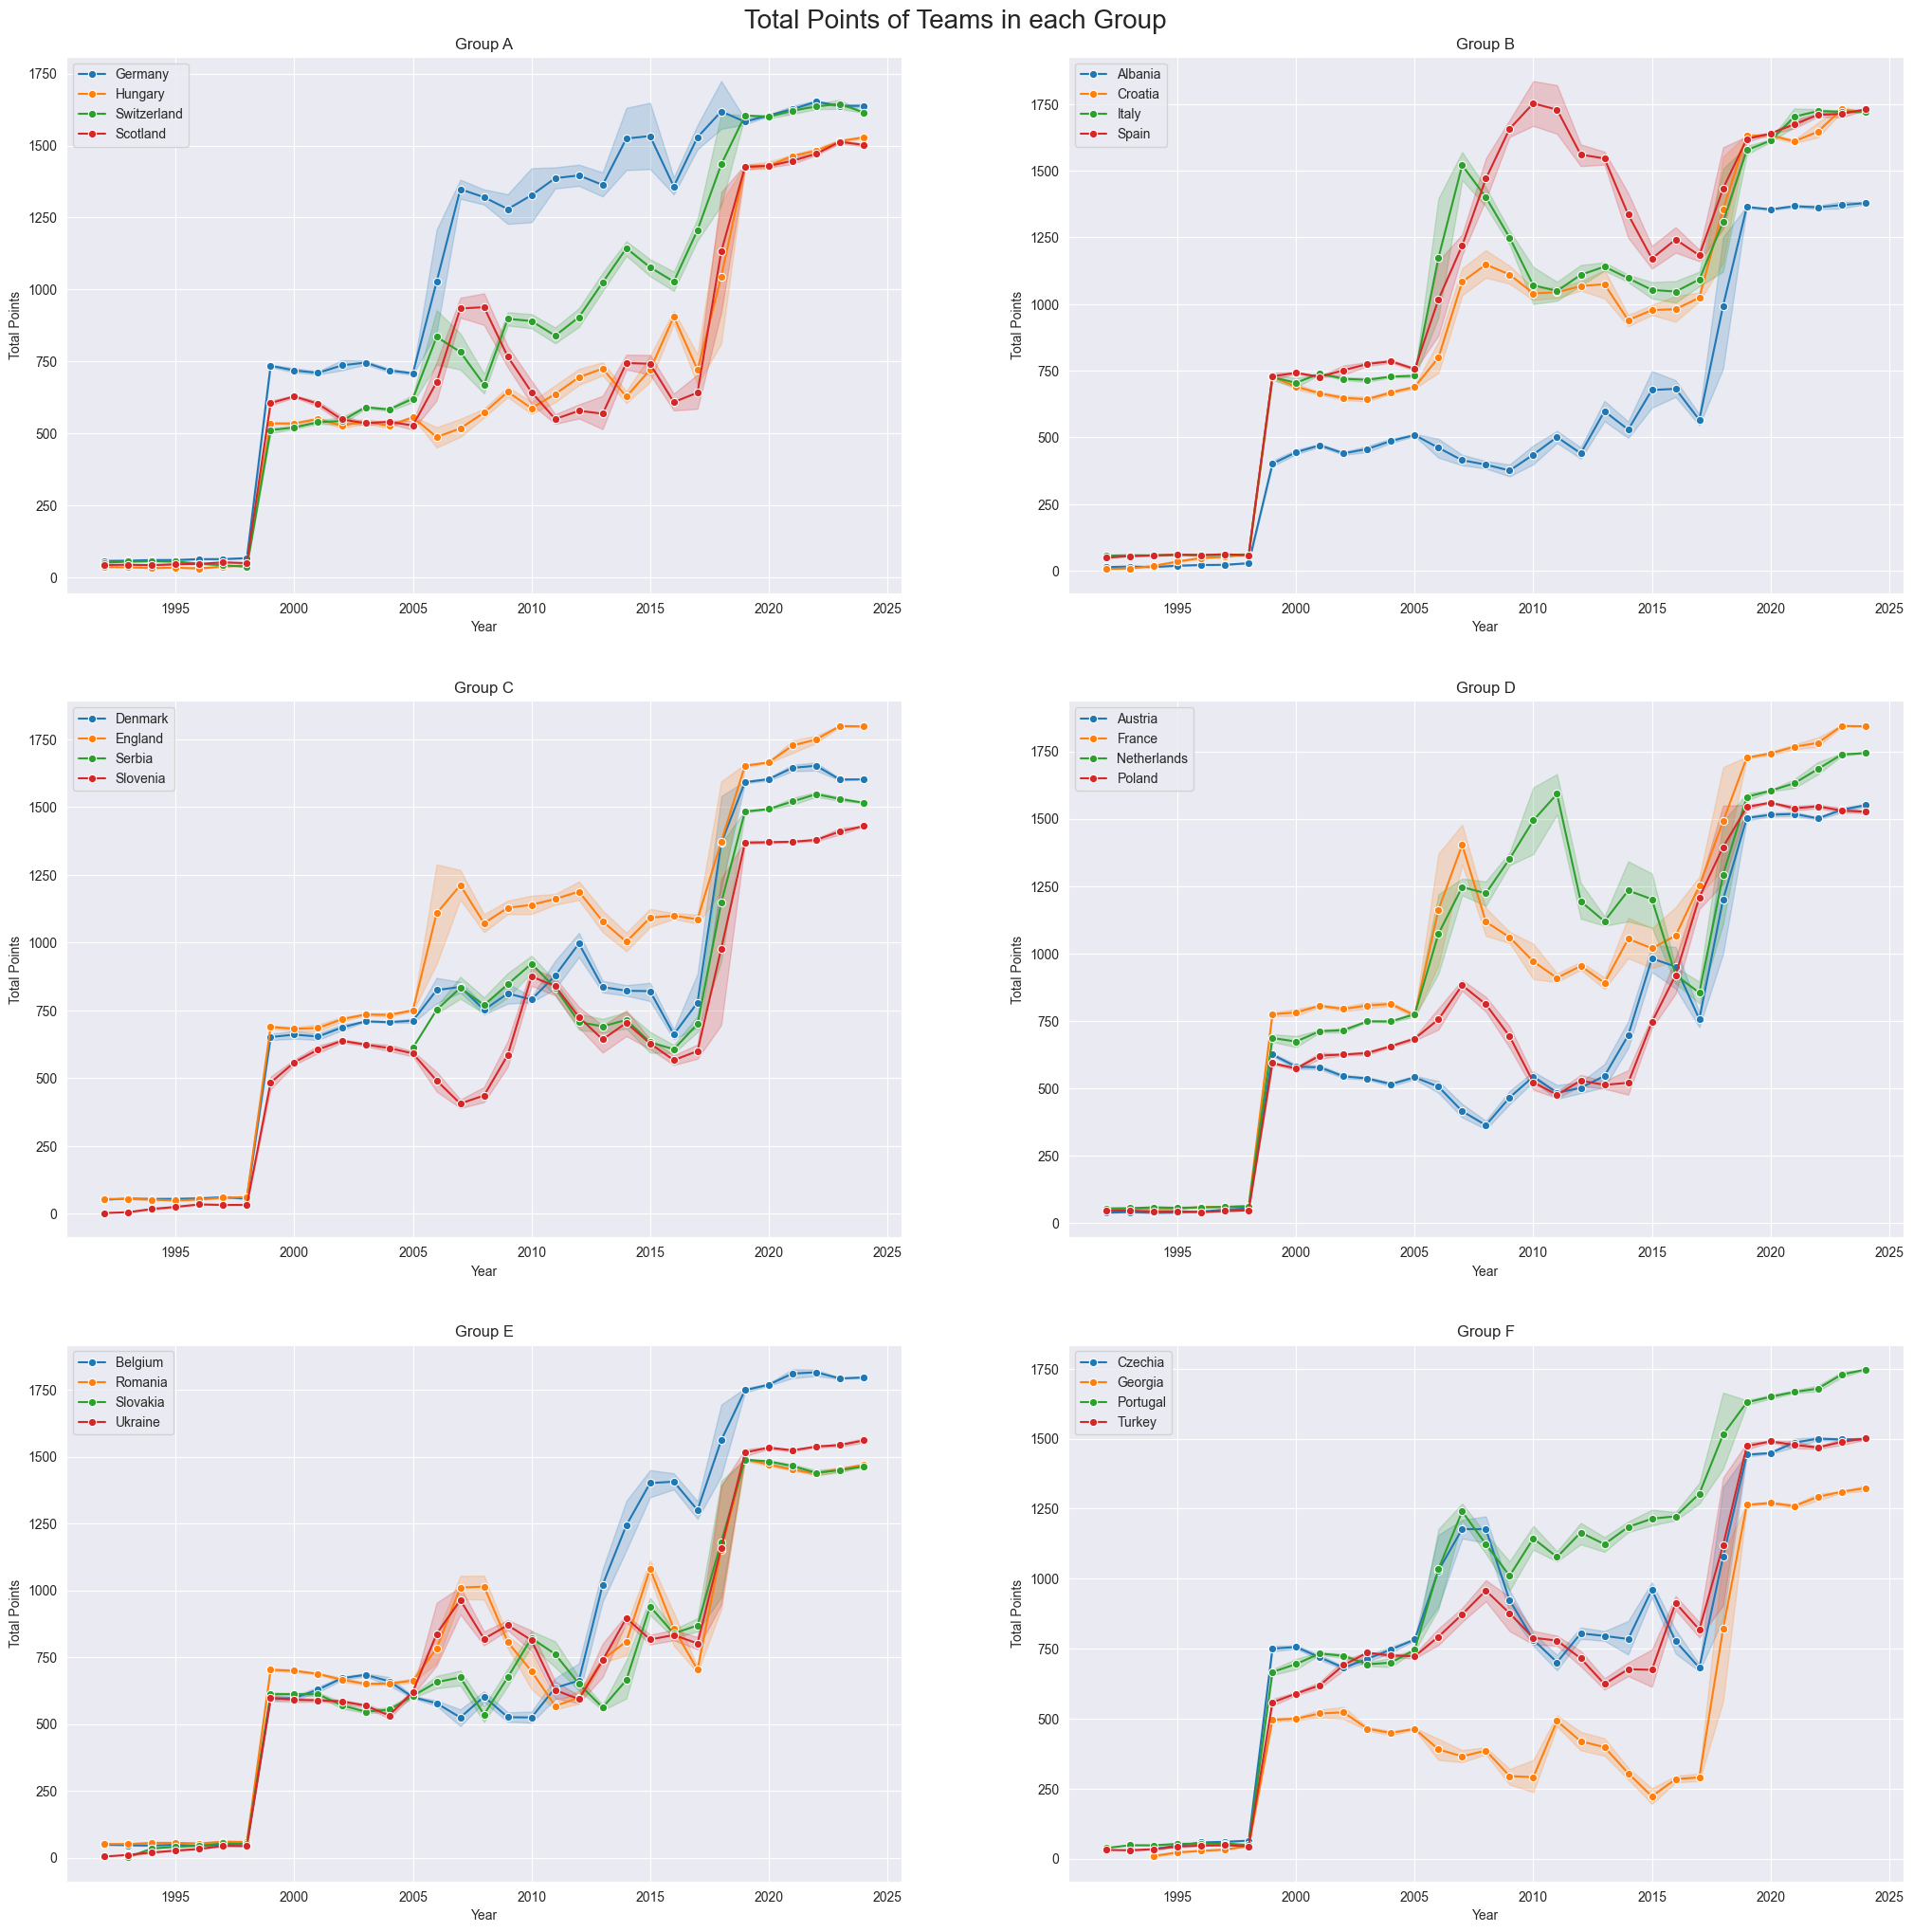

In [13]:
fig, axes = plt.subplots(3,2, figsize=(25,25))
plt.subplots_adjust(hspace=0.2)
axes = axes.flatten()
fig.suptitle("Total Points of Teams in each Group", fontsize = 20, y=0.9)

for ax,grp in zip(axes, euro_grp_stage):
    for team in euro_grp_stage[grp]:
        data = euro_ranking[euro_ranking['country_full']==team]
        sns.set_style('darkgrid')
        sns.lineplot(ax=ax, x='year', y='total_points', data=data, marker='o', label=team)
        ax.set_xlabel('Year')
        ax.set_ylabel('Total Points')
        ax.set_title(f'Group {grp}')

Visualizing of the Rank and Total Points in 2024

In [14]:
latest_year = euro_ranking['rank_date'].max()
latest_year_data = euro_ranking[euro_ranking['rank_date']==latest_year].reset_index()
print(latest_year_data.loc[:,['country_full','rank','total_points']])

   country_full  rank  total_points
0       Georgia  75.0       1333.76
1       Albania  66.0       1375.10
2      Slovenia  57.0       1427.84
3       Hungary  26.0       1532.20
4       Austria  25.0       1554.86
5       Ukraine  22.0       1568.86
6       Denmark  21.0       1602.72
7   Switzerland  19.0       1616.41
8        Poland  28.0       1531.49
9       Croatia  10.0       1721.07
10        Italy   9.0       1724.60
11        Spain   8.0       1727.50
12  Netherlands   7.0       1742.29
13     Portugal   6.0       1748.11
14      Germany  16.0       1644.21
15     Slovakia  48.0       1461.55
16      Romania  46.0       1468.17
17       Turkey  40.0       1495.94
18     Scotland  39.0       1497.46
19      Czechia  36.0       1501.47
20       Serbia  33.0       1514.20
21      England   4.0       1794.90
22       France   2.0       1840.59
23      Belgium   3.0       1795.23


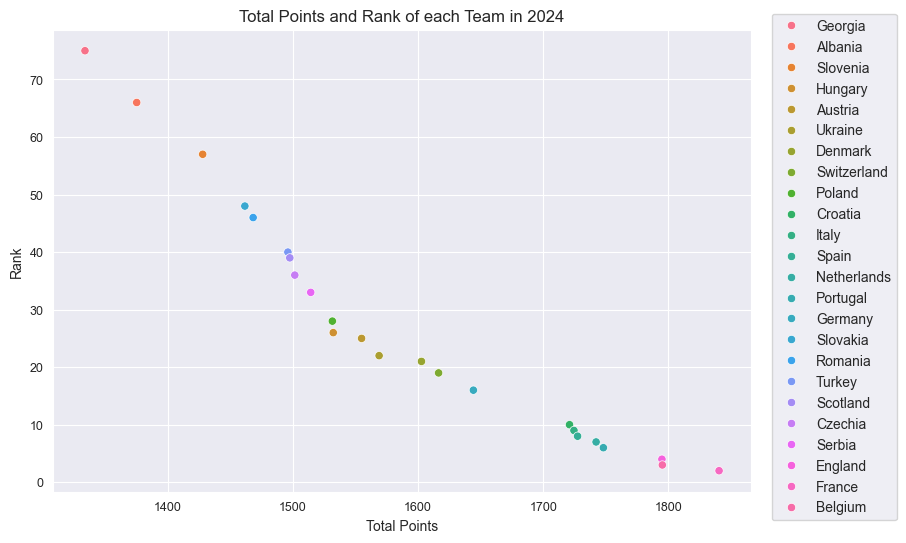

In [15]:
# Plotting total points and ranks
plt.figure(figsize=(9,6))
sns.scatterplot(x='total_points', y='rank', hue='country_full', data=latest_year_data)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Rank')
plt.xlabel('Total Points')
plt.title("Total Points and Rank of each Team in 2024")
plt.legend(bbox_to_anchor=(1.02, 1.05))


Calculation of Average Rank of each Team

In [16]:
average_rank_of_each_team = euro_ranking.groupby('country_full')['rank'].mean().reset_index()
print(average_rank_of_each_team)

   country_full       rank
0       Albania  78.045181
1       Austria  47.587349
2       Belgium  26.424699
3       Croatia  20.237952
4       Czechia  21.280000
5       Denmark  19.337349
6       England   9.780120
7        France   8.087349
8       Georgia  90.806154
9       Germany   6.256024
10      Hungary  50.981928
11        Italy   8.698795
12  Netherlands   9.277108
13       Poland  35.355422
14     Portugal  10.798193
15      Romania  25.659639
16     Scotland  41.156627
17       Serbia  32.613757
18     Slovakia  38.798780
19     Slovenia  56.174699
20        Spain   5.683735
21  Switzerland  28.789157
22       Turkey  30.743976
23      Ukraine  39.629518


Text(0.5, 1.0, 'Average Rank of each Team')

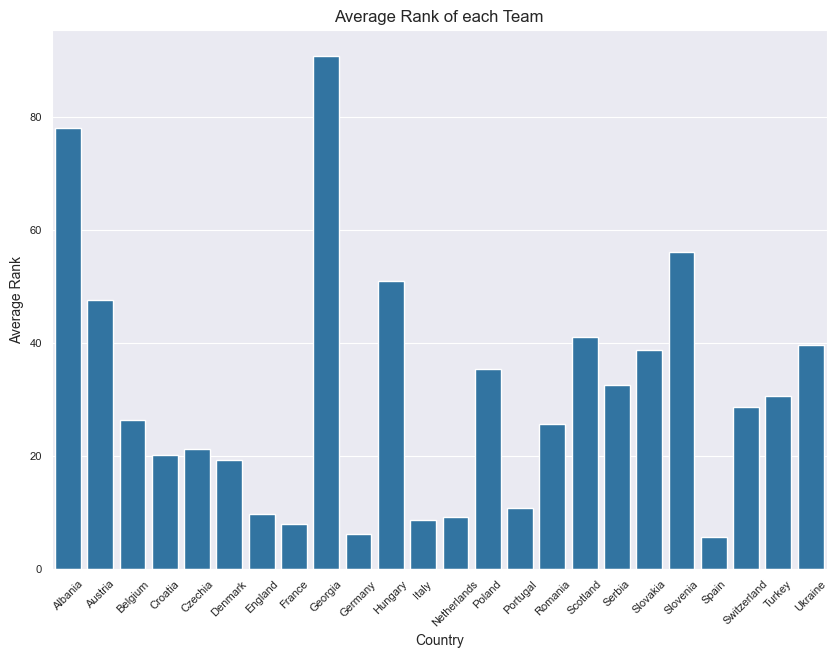

In [17]:
plt.figure(figsize=(10,7))
sns.barplot(x='country_full', y='rank', data=average_rank_of_each_team)
plt.xticks(fontsize=8,rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('Country')
plt.ylabel('Average Rank')
plt.title('Average Rank of each Team')